In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DailyDelhiClimateTrain.csv")



In [11]:
#Convert date column
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

#line to remove warning
df = df.asfreq('D')

#welect only meantemp (univariate time series)
ts = df['meantemp']


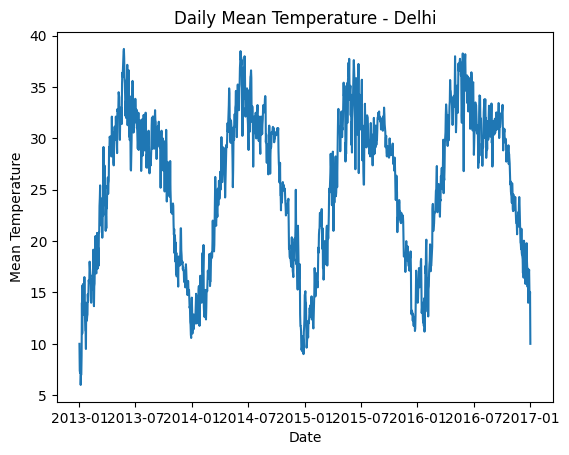

In [12]:

#Plot
plt.figure()
plt.plot(ts)
plt.title("Daily Mean Temperature - Delhi")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()


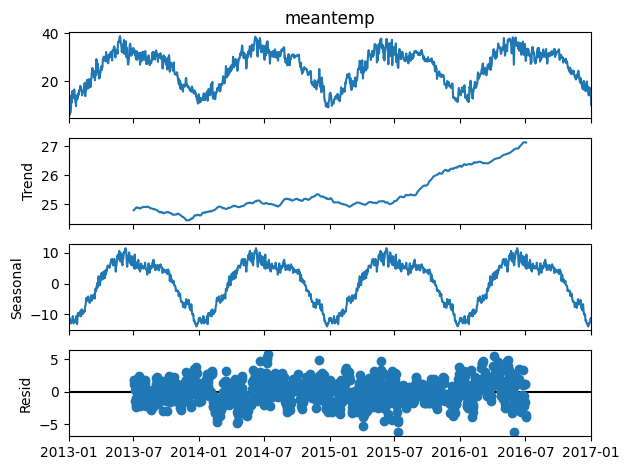

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, model='additive', period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
decomposition.plot()
plt.show()


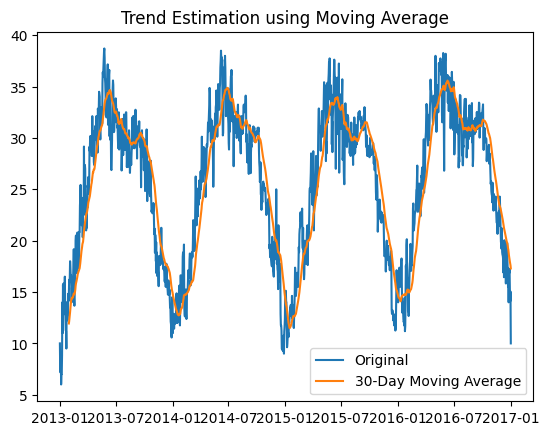

In [14]:
ts_ma = ts.rolling(window=30).mean()

plt.figure()
plt.plot(ts, label='Original')
plt.plot(ts_ma, label='30-Day Moving Average')
plt.legend()
plt.title("Trend Estimation using Moving Average")
plt.show()


In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Split into train and test
train = ts[:-100]
test = ts[-100:]

# Fit ARIMA
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=100)


In [16]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1362
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2594.226
Date:                Wed, 11 Feb 2026   AIC                           5198.453
Time:                        13:43:09   BIC                           5224.532
Sample:                    01-01-2013   HQIC                          5208.216
                         - 09-23-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2820      0.182     -1.552      0.121      -0.638       0.074
ar.L2          0.5304      0.095      5.611      0.000       0.345       0.716
ma.L1          0.0467      0.184      0.254      0.8

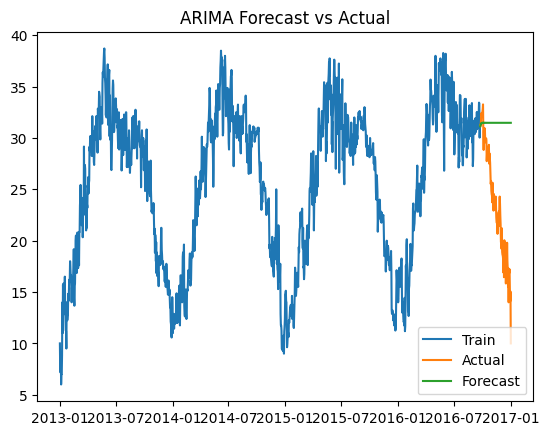

In [17]:
plt.figure()
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)


RMSE: 9.501862360424923


The dataset contains daily mean temperature (2013–2017) with over 1400 observations.

The time series plot shows clear yearly seasonality and trend. Decomposition confirmed three components: trend, seasonal pattern, and residual noise.

A 30-day moving average was used to estimate the trend.

An ARIMA(2,1,2) model was fitted to forecast the next 100 days. The model captured the overall trend but did not fully account for seasonal effects.

Overall, the series shows strong seasonality and moderate forecasting accuracy.